In [26]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz, cholesky
import lightcones.linalg as ll

In [43]:
epsilons = [0.1, 0.2]
alphas = [0.2, 0.2]
omegas = [1, 3]
dt = 0.01
t_past = 60
t_future = 60 

In [44]:
t_max = t_past + t_future
t = np.arange(0, t_max, dt)
n_t_max = len(t)

In [45]:
n_t_past = int(t_past / dt)
n_t_future = int(t_future / dt)

In [46]:
M = np.zeros(n_t_max) 
for i in range(n_t_max):
    tau = t[i] - t[0]
    for j in range(len(epsilons)):
        M[i] = M[i] + alphas[j] * math.exp(- epsilons[j] * abs(tau)) * math.cos(omegas[j] * abs(tau))

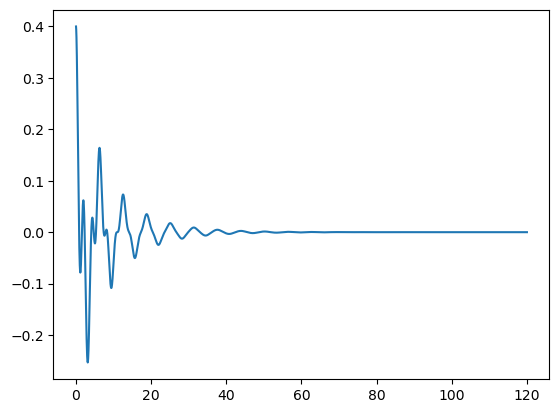

In [47]:
plt.plot(t, M)

In [50]:
T = toeplitz(M)
L = cholesky(T, lower=True)

In [51]:
C = L[n_t_future:, n_t_future]

In [52]:
# test
M_test = np.zeros(n_t_past)
for i in range(n_t_past):
    M_test[i] = np.dot(C[:len(C)-i], C[i:])

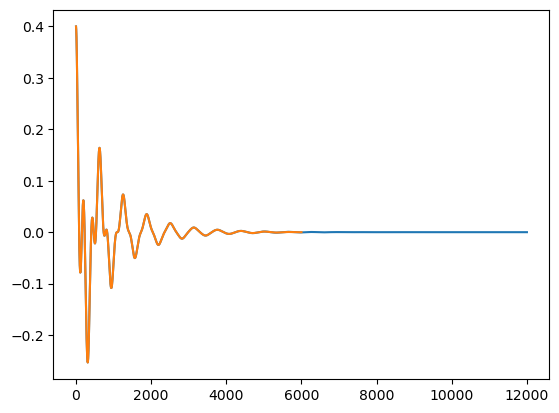

In [53]:
#plt.yscale('log')
plt.plot(M)
plt.plot(M_test)
#plt.xlim([0, 100])

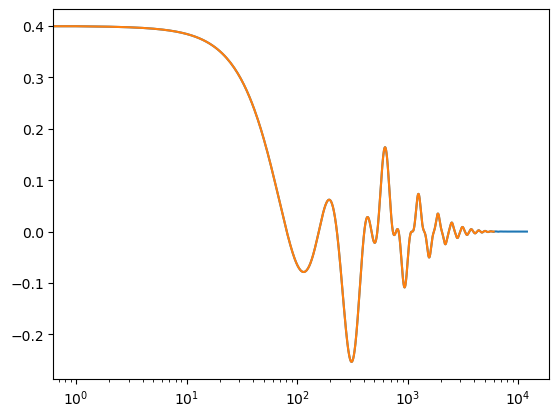

In [54]:
plt.xscale('log')
plt.plot(M)
plt.plot(M_test)